# Bachelor Project Data Analysis

- STEP 1: Reading and Merging data

In [2]:
import pandas as pd 
import os
#dirname = os.path.dirname(__file__)
# Read the Excel file
df_rain = pd.read_excel('./data_sources/Brazil Rain Data.xlsx')


df_rain_cleaned = df_rain[['DateValueCET', 'TimeValueCET', 'PowerPriceAreaCode', 'Value']]

# Read the Excel file
df_price = pd.read_excel('./data_sources/Price Data.xlsx')

df_price_cleaned = df_price[['DateValueCET', 'TimeValueCET', 'PowerPriceAreaCode', 'PriceMWh']]

merged_df = pd.merge(df_rain_cleaned, df_price_cleaned , on=['DateValueCET', 'TimeValueCET', 'PowerPriceAreaCode'], how='outer')
display(merged_df.head())

,DateValueCET,TimeValueCET,PowerPriceAreaCode,Value,PriceMWh
0,2024-09-09,05:00:00,BRAZIL_NORTHEAST,-178.5164,272.02
1,2024-09-09,05:00:00,BRAZIL_SOUTH,-260.3010,272.06
2,2024-09-09,05:00:00,BRAZIL_NORTH,-129.8086,272.06
3,2024-09-09,05:00:00,BRAZIL_SIN,-1050.1289,NaN
4,2024-09-09,05:00:00,BRAZIL_SOUTHEAST_CENTRALWEST,-481.5028,272.04


# Data Analysis

### Columns present across different data sources : 
- **DateValueCET**- sets the date for specific measurement
- **TimeValueCET** - sets the hour for the specific measurement

## 1. Brazil Electricity Prices
relevant columns: 
- **PowerPriceAreaCode:** values (BRAZIL_SOUTH, BRAZIL_NORTH, BRAZIL_NORTHEAST, RAZIL_SOUTHEAST_CENTRALWEST)
- **Granularity:** values(hour, weekly)
- **PriceMWh**  

## 2. Brazil Precipitation Data    
relevant columns: 
- **Value:** which is the actual measurement
- **Unit:** values(GWh), even though it is a precipitation, it is actually measured as "the energy potential associated with rainfall and water flow rather than just millimeters of rainfall. This approach quantifies how much electricity (in GWh) could be generated from the available water resources."
- **PowerPriceAreaCode:** values (BRAZIL_SOUTH, BRAZIL_NORTH, BRAZIL_NORTHEAST, RAZIL_SOUTHEAST_CENTRALWEST) + BRAZIL_SIN

> NOTE: BRAZIL_SIN is not a powerprice area code, SIN is in portuguese National Interconnected System (The National Interconnected System - SIN is a large hydrothermal system for the production and transmission of electricity, whose operation involves complex simulation models that are under the coordination and control of the National Electric System Operator - ONS, which, in turn, is inspected and regulated by the National Electric Energy Agency - ANEEL.he hydraulic operation of the reservoir systems that are part of the SIN is a real-time activity that consists of the operationalization of hydraulic guidelines that, using the regulation capacity of the reservoirs, allows the management of water storage in the reservoirs, considering energy optimization, flood control and compliance with multiple uses of water.Using the basin approach, the SIN module includes operational data from 162 infrastructures for the generation of hydroelectric plants dispatched by the ONS. In this module, it is possible to consult information such as turbine flow, useful volume stored, flow released, among others.)

This will be excluded, as it is a sum of all regions and not relevant in this case.

## 2. Brazil Temperature Data 
relevant columns: 
- **Value:** which is the actual measurement
- **Unit:** values(Celsius)
- **PowerPriceAreaCode:** values (BRAZIL_SOUTH, BRAZIL_NORTH, BRAZIL_NORTHEAST, RAZIL_SOUTHEAST_CENTRALWEST)

In [3]:
display(merged_df.describe())

merged_df.groupby(['PowerPriceAreaCode']).describe()
merged_df['DateTime'] = pd.to_datetime((merged_df['DateValueCET']).astype(str) + ' ' + (merged_df['TimeValueCET']).astype(str), format='%Y-%m-%d %H:%M:%S')
merged_df['DateTime'] = pd.to_datetime(merged_df['DateTime'], format='%Y-%m-%d %H:%M:%S')

#Now lets look at data for 2023

data_2023 = merged_df[merged_df['DateTime'].dt.year == 2022]
data_2023_SE = data_2023[(data_2023['PowerPriceAreaCode'] == 'BRAZIL_SOUTHEAST_CENTRALWEST') & (data_2023['DateTime'].dt.year == 2022)]
data_2023.groupby(['PowerPriceAreaCode']).describe()



,Value,PriceMWh
count,79790.000000,100000.000000
mean,522.251509,69.466587
std,1979.155629,33.267471
min,-2943.896900,49.770000
25%,-289.749775,55.700000
50%,-114.516750,61.510000
75%,702.928625,69.040000
max,21552.455000,1470.570000


Value                                       \
                              count         mean          std        min   
PowerPriceAreaCode                                                         
BRAZIL_NORTH                  365.0    97.297144   396.181125  -297.9528   
BRAZIL_NORTHEAST              365.0   119.074911   623.884095  -437.2178   
BRAZIL_SIN                    365.0  1092.005851  2871.318923 -2453.2936   
BRAZIL_SOUTH                  365.0   264.923455   719.980379  -418.1807   
BRAZIL_SOUTHEAST_CENTRALWEST  365.0   610.710340  2057.429497 -1763.9172   

                                                                          \
                                    25%       50%        75%         max   
PowerPriceAreaCode                                                         
BRAZIL_NORTH                  -167.4382  -64.1773   249.2040   2044.2022   
BRAZIL_NORTHEAST              -243.8048 -179.2197   295.4669   3147.2603   
BRAZIL_SIN                   -1114.1392  149.4291  2430.6923  10993.2797   
BRAZIL_SOUTH                  -211.8949    7.7676   500.5007   4666.6457   
BRAZIL_SOUTHEAST_CENTRALWEST  -832.2397 -251.7886  1517.7194   8654.5385   

                             PriceMWh                                     \
                                count       mean        std    min   25%   
PowerPriceAreaCode                                                         
BRAZIL_NORTH                   8760.0  58.433328   9.467612  49.77  55.7   
BRAZIL_NORTHEAST               8760.0  58.565532   9.526873  55.70  55.7   
BRAZIL_SIN                        0.0        NaN        NaN    NaN   NaN   
BRAZIL_SOUTH                   8760.0  59.052566  10.282492  55.70  55.7   
BRAZIL_SOUTHEAST_CENTRALWEST   8760.0  59.051711  10.282357  55.70  55.7   

                                                  
                               50%   75%     max  
PowerPriceAreaCode                                
BRAZIL_NORTH                  55.7  55.7  130.73  
BRAZIL_NORTHEAST              55.7  55.7  130.73  
BRAZIL_SIN                     NaN   NaN     NaN  
BRAZIL_SOUTH                  55.7  55.7  306.64  
BRAZIL_SOUTHEAST_CENTRALWEST  55.7  55.7  306.64

### Heatmap
- maybe not relavant for out project

C:\Users\veron\AppData\Local\Temp\ipykernel_31576\2169033053.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.heatmap(grouped_df.corr(),


<AxesSubplot: ylabel='PowerPriceAreaCode-None'>

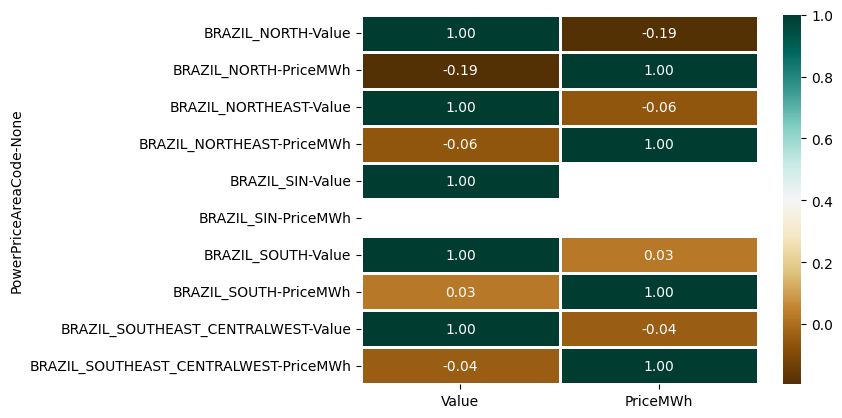

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import plotly as plt
import seaborn as sns

label_encoder = LabelEncoder()
grouped_df = data_2023.groupby(['PowerPriceAreaCode'])


sns.heatmap(grouped_df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

C:\Users\veron\AppData\Local\Temp\ipykernel_31576\2110995679.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023_SE['Value'] = data_2023_SE['Value']*1000


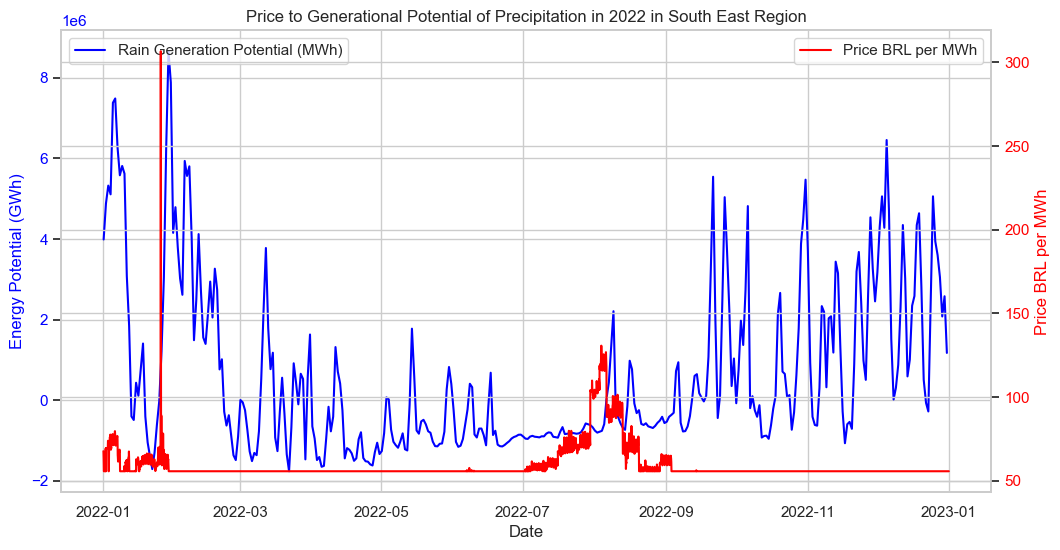

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background

fig, ax1 = plt.subplots(figsize=(12, 6))  # Creating a figure and axis
# Convert GWh to MWh
data_2023_SE['Value'] = data_2023_SE['Value']*1000

# Plotting the first line on the primary y-axis
sns.lineplot(data=data_2023_SE[['Value', 'DateTime']].dropna(), x='DateTime', y='Value', color='blue', ax=ax1, label='Rain Generation Potential (MWh)')
ax1.set_ylabel('Energy Potential (GWh)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis
ax2 = ax1.twinx()

# Plotting the second line on the secondary y-axis
sns.lineplot(data=data_2023_SE[['PriceMWh', 'DateTime']].dropna(), x='DateTime', y='PriceMWh', color='red', ax=ax2, label='Price BRL per MWh')
ax2.set_ylabel('Price BRL per MWh', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding labels and title
ax1.set_xlabel('Date')
plt.title('Price to Generational Potential of Precipitation in 2022 in South East Region')

# Optionally, you can add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


## Considering Temperature


In [7]:
import pandas as pd 

# Read the Excel file
df_temp = pd.read_excel('./data_sources/Temperature_Data.xlsx')
df_temp = df_temp.rename(columns = {"Value": "Temperature"})
df_temp = df_temp[['DateValueCET', 'TimeValueCET', 'PowerPriceAreaCode', 'Temperature','Unit']]
df_temp['DateTime'] = pd.to_datetime((df_temp['DateValueCET']).astype(str) + ' ' + (df_temp['TimeValueCET']).astype(str), format='%Y-%m-%d %H:%M:%S')
df_temp['DateTime'] = pd.to_datetime(df_temp['DateTime'], format='%Y-%m-%d %H:%M:%S')
df_temp = df_temp.groupby(['DateTime', 'PowerPriceAreaCode']).mean().reset_index()

C:\Users\veron\AppData\Local\Temp\ipykernel_31576\1191216722.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_temp = df_temp.groupby(['DateTime', 'PowerPriceAreaCode']).mean().reset_index()


In [8]:


# Convert 'DateTime' to date only (without time) for daily grouping
df_temp['Date'] = df_temp['DateTime'].dt.date

# Group by 'Date' and 'PowerPriceAreaCode' to calculate the daily mean
df_daily_mean = df_temp.groupby(['Date', 'PowerPriceAreaCode']).mean()

# Merge the daily mean back to the original DataFrame on 'Date' and 'PowerPriceAreaCode'
daily_merged = pd.merge(df_temp, df_daily_mean, on=['Date', 'PowerPriceAreaCode'])
daily_merged= daily_merged.rename(columns = {'Temperature_x': 'Hourly_Temperature', 'Temperature_y': 'Daily_Average_Temperature'})

all_values =  pd.merge(merged_df, daily_merged, on=['PowerPriceAreaCode', 'DateTime'], how='outer')
data_2023_SE_with_temperature = all_values[(all_values['PowerPriceAreaCode'] == 'BRAZIL_SOUTHEAST_CENTRALWEST') & (all_values['DateTime'].dt.year == 2024)]


display(data_2023_SE_with_temperature.head())


C:\Users\veron\AppData\Local\Temp\ipykernel_31576\144149293.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily_mean = df_temp.groupby(['Date', 'PowerPriceAreaCode']).mean()


,DateValueCET,TimeValueCET,PowerPriceAreaCode,Value,PriceMWh,DateTime,Hourly_Temperature,Date,Daily_Average_Temperature
4,2024-09-09,05:00:00,BRAZIL_SOUTHEAST_CENTRALWEST,-481.5028,272.04,2024-09-09 05:00:00,20.740000,2024-09-09,23.569183
8,2024-09-08,05:00:00,BRAZIL_SOUTHEAST_CENTRALWEST,-501.8641,271.58,2024-09-08 05:00:00,20.373810,2024-09-08,23.674206
11,2024-09-07,05:00:00,BRAZIL_SOUTHEAST_CENTRALWEST,-501.5887,271.96,2024-09-07 05:00:00,18.625238,2024-09-07,22.206844
18,2024-09-06,05:00:00,BRAZIL_SOUTHEAST_CENTRALWEST,-253.9101,248.83,2024-09-06 05:00:00,18.235476,2024-09-06,20.986295
22,2024-09-05,05:00:00,BRAZIL_SOUTHEAST_CENTRALWEST,-258.3986,249.66,2024-09-05 05:00:00,19.703095,2024-09-05,22.469969


C:\Users\veron\AppData\Local\Temp\ipykernel_31576\1773736518.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023_SE['Value'] = data_2023_SE['Value']*1000


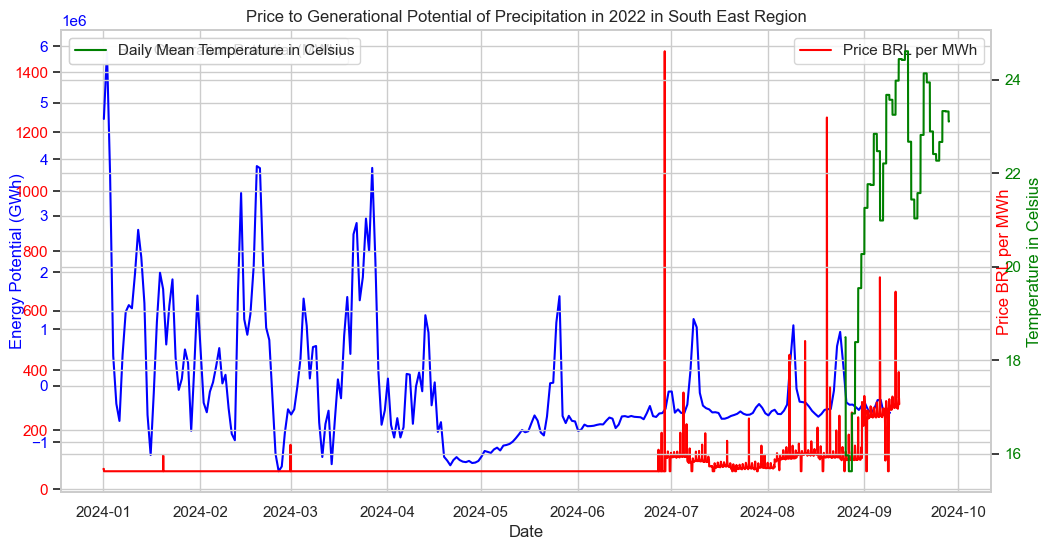

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background

fig, ax1 = plt.subplots(figsize=(12, 6))  # Creating a figure and axis
# Convert GWh to MWh

data_2023_SE= data_2023_SE_with_temperature
data_2023_SE['Value'] = data_2023_SE['Value']*1000

# Plotting the first line on the primary y-axis
sns.lineplot(data=data_2023_SE[['Value', 'DateTime']].dropna(), x='DateTime', y='Value', color='blue', ax=ax1, label='Rain Generation Potential (MWh)')
ax1.set_ylabel('Energy Potential (GWh)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis
ax2 = ax1.twinx()

# Plotting the second line on the secondary y-axis
sns.lineplot(data=data_2023_SE[['PriceMWh', 'DateTime']].dropna(), x='DateTime', y='PriceMWh', color='red', ax=ax2, label='Price BRL per MWh')
ax2.set_ylabel('Price BRL per MWh', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Creating a third y-axis
ax3 = ax2.twinx()
# Plotting the third line line on the secondary y-axis
sns.lineplot(data=data_2023_SE[['Daily_Average_Temperature', 'DateTime']].dropna(), x='DateTime', y='Daily_Average_Temperature', color='green', ax=ax3, label='Daily Mean Temperature in Celsius')
ax3.set_ylabel('Temperature in Celsius', color='green')
ax3.tick_params(axis='y', labelcolor='green')

# Adding labels and title
ax1.set_xlabel('Date')
plt.title('Price to Generational Potential of Precipitation in 2022 in South East Region')

# Optionally, you can add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()